여러개의 텐서를 입력받아 여러개의 텐서를 출력하는 모델을 알아 봅시다. 그 예로서 <br>
yA = a * (xA * xB ) + b <br>
yB = c * (xA + xB ) + d <br>
의 관계를 가지는 데이터에서 a, b, c, d 를 학습으로 발견해봅시다.

In [1]:
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = 2; b = 1; c = 2; d = 1

x_train_A = np.random.rand(1000,1) * 2 - 1
x_train_B = np.random.rand(1000,1) * 2 - 1
y_train_A = a * (x_train_A * x_train_B) + b
y_train_B = c * (x_train_A + x_train_B) + d

xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')
hA = layers.Multiply(name='mul')([xA, xB])
hB = layers.Add(name='add')([xA, xB])
yA = layers.Dense(1, name='yA')(hA)
yB = layers.Dense(1, name='yB')(hB)

Using TensorFlow backend.


모델을 정의할때 여러개의 입력과 출력이 있으면 리스트 형식으로 넣어주면 됩니다. 

In [2]:
model = models.Model([xA, xB], [yA, yB])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
mul (Multiply)                  (None, 1)            0           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
add (Add)                       (None, 1)            0           xA[0][0]                         
          

모든 출력에 mse loss 를 적용하고 그것들을 더해 전체 loss 를 정의하려면 다음과 같이 컴파일하면 됩니다.

In [3]:
model.compile(optimizer='adam', loss='mse')

각각 출력에 특정 loss 와 가중치를 지정하여 다 더해 전체 loss 를 정의하려면 다음과 같이 컴파일하면 됩니다. 전체 loss 는 하나이므로 그것을 최적화하는 optimizer 는 하나입니다.

In [4]:
model.compile(optimizer='adam', loss={'yA': 'mse', 'yB': 'mse'},
              loss_weights={'yA': 2., 'yB': 1.})

모델을 정의할 때처럼 여러 입력과 출력 데이터를 리스트 형식으로 넣고 학습을 합니다. 전체 loss 는 각각 loss 에 가중치를 곱해서 다 더한 값이라는것을 확인할 수 있습니다.

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 0s 355us/step - loss: 4.4259 - yA_loss: 1.3982 - yB_loss: 1.6296 - val_loss: 3.9702 - val_yA_loss: 1.2271 - val_yB_loss: 1.5160
Epoch 2/200
800/800 [==============================] - 0s 108us/step - loss: 3.7491 - yA_loss: 1.1930 - yB_loss: 1.3632 - val_loss: 3.3518 - val_yA_loss: 1.0421 - val_yB_loss: 1.2677
Epoch 3/200
800/800 [==============================] - 0s 113us/step - loss: 3.1640 - yA_loss: 1.0133 - yB_loss: 1.1375 - val_loss: 2.8128 - val_yA_loss: 0.8814 - val_yB_loss: 1.0500
Epoch 4/200
800/800 [==============================] - 0s 105us/step - loss: 2.6590 - yA_loss: 0.8582 - yB_loss: 0.9427 - val_loss: 2.3558 - val_yA_loss: 0.7447 - val_yB_loss: 0.8663
Epoch 5/200
800/800 [==============================] - 0s 115us/step - loss: 2.2259 - yA_loss: 0.7254 - yB_loss: 0.7750 - val_loss: 1.9621 - val_yA_loss: 0.6272 - val_yB_loss: 0.7077
Epoch 6/200
800/800 [==================

Epoch 44/200
800/800 [==============================] - 0s 100us/step - loss: 4.8163e-04 - yA_loss: 2.4081e-04 - yB_loss: 4.0990e-11 - val_loss: 3.6816e-04 - val_yA_loss: 1.8408e-04 - val_yB_loss: 2.5332e-11
Epoch 45/200
800/800 [==============================] - 0s 103us/step - loss: 3.1940e-04 - yA_loss: 1.5970e-04 - yB_loss: 2.5925e-11 - val_loss: 2.4090e-04 - val_yA_loss: 1.2045e-04 - val_yB_loss: 2.5332e-11
Epoch 46/200
800/800 [==============================] - 0s 152us/step - loss: 2.0727e-04 - yA_loss: 1.0363e-04 - yB_loss: 2.5925e-11 - val_loss: 1.5627e-04 - val_yA_loss: 7.8137e-05 - val_yB_loss: 2.5332e-11
Epoch 47/200
800/800 [==============================] - 0s 137us/step - loss: 1.3186e-04 - yA_loss: 6.5929e-05 - yB_loss: 2.5709e-11 - val_loss: 9.6825e-05 - val_yA_loss: 4.8412e-05 - val_yB_loss: 2.5037e-11
Epoch 48/200
800/800 [==============================] - 0s 115us/step - loss: 8.1827e-05 - yA_loss: 4.0913e-05 - yB_loss: 2.3041e-11 - val_loss: 5.8875e-05 - val_yA_los

800/800 [==============================] - 0s 110us/step - loss: 2.8553e-12 - yA_loss: 1.2133e-12 - yB_loss: 4.2876e-13 - val_loss: 2.6917e-12 - val_yA_loss: 1.1525e-12 - val_yB_loss: 3.8664e-13
Epoch 84/200
800/800 [==============================] - 0s 100us/step - loss: 2.8238e-12 - yA_loss: 1.2133e-12 - yB_loss: 3.9724e-13 - val_loss: 2.6917e-12 - val_yA_loss: 1.1525e-12 - val_yB_loss: 3.8664e-13
Epoch 85/200
800/800 [==============================] - 0s 101us/step - loss: 2.2553e-12 - yA_loss: 9.2901e-13 - yB_loss: 3.9724e-13 - val_loss: 1.7157e-12 - val_yA_loss: 6.6451e-13 - val_yB_loss: 3.8664e-13
Epoch 86/200
800/800 [==============================] - 0s 100us/step - loss: 1.7681e-12 - yA_loss: 6.8545e-13 - yB_loss: 3.9724e-13 - val_loss: 1.7157e-12 - val_yA_loss: 6.6451e-13 - val_yB_loss: 3.8664e-13
Epoch 87/200
800/800 [==============================] - 0s 110us/step - loss: 1.7608e-12 - yA_loss: 6.8545e-13 - yB_loss: 3.8990e-13 - val_loss: 1.6875e-12 - val_yA_loss: 6.6451e-13

800/800 [==============================] - 0s 151us/step - loss: 2.3580e-14 - yA_loss: 8.7053e-15 - yB_loss: 6.1691e-15 - val_loss: 2.1351e-14 - val_yA_loss: 7.2019e-15 - val_yB_loss: 6.9469e-15
Epoch 123/200
800/800 [==============================] - 0s 131us/step - loss: 2.3580e-14 - yA_loss: 8.7053e-15 - yB_loss: 6.1691e-15 - val_loss: 2.1351e-14 - val_yA_loss: 7.2019e-15 - val_yB_loss: 6.9469e-15
Epoch 124/200
800/800 [==============================] - 0s 130us/step - loss: 2.3580e-14 - yA_loss: 8.7053e-15 - yB_loss: 6.1691e-15 - val_loss: 2.1351e-14 - val_yA_loss: 7.2019e-15 - val_yB_loss: 6.9469e-15
Epoch 125/200
800/800 [==============================] - 0s 127us/step - loss: 2.3580e-14 - yA_loss: 8.7053e-15 - yB_loss: 6.1691e-15 - val_loss: 2.1351e-14 - val_yA_loss: 7.2019e-15 - val_yB_loss: 6.9469e-15
Epoch 126/200
800/800 [==============================] - 0s 133us/step - loss: 2.3580e-14 - yA_loss: 8.7053e-15 - yB_loss: 6.1691e-15 - val_loss: 2.1351e-14 - val_yA_loss: 7.2019

800/800 [==============================] - 0s 106us/step - loss: 1.1984e-14 - yA_loss: 2.3631e-15 - yB_loss: 7.2575e-15 - val_loss: 1.1516e-14 - val_yA_loss: 2.2848e-15 - val_yB_loss: 6.9469e-15
Epoch 162/200
800/800 [==============================] - 0s 106us/step - loss: 1.9673e-14 - yA_loss: 2.5427e-15 - yB_loss: 1.4587e-14 - val_loss: 9.3444e-14 - val_yA_loss: 2.2848e-15 - val_yB_loss: 8.8874e-14
Epoch 163/200
800/800 [==============================] - 0s 107us/step - loss: 2.7743e-14 - yA_loss: 2.4600e-15 - yB_loss: 2.2823e-14 - val_loss: 1.1516e-14 - val_yA_loss: 2.2848e-15 - val_yB_loss: 6.9469e-15
Epoch 164/200
800/800 [==============================] - 0s 100us/step - loss: 1.0943e-14 - yA_loss: 2.2566e-15 - yB_loss: 6.4300e-15 - val_loss: 2.5464e-14 - val_yA_loss: 2.2848e-15 - val_yB_loss: 2.0894e-14
Epoch 165/200
800/800 [==============================] - 0s 101us/step - loss: 3.7418e-14 - yA_loss: 2.1766e-15 - yB_loss: 3.3064e-14 - val_loss: 1.3762e-14 - val_yA_loss: 2.2848

800/800 [==============================] - 0s 142us/step - loss: 9.6754e-11 - yA_loss: 4.8238e-11 - yB_loss: 2.7666e-13 - val_loss: 2.1127e-10 - val_yA_loss: 1.0546e-10 - val_yB_loss: 3.5465e-13


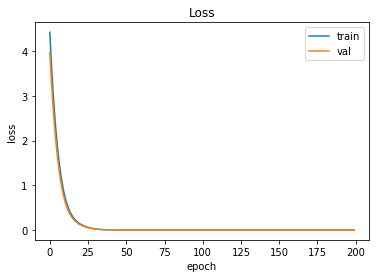

yA_weights
[array([[1.9999828]], dtype=float32), array([0.9999912], dtype=float32)]
yB_weights
[array([[2.]], dtype=float32), array([1.0000006], dtype=float32)]


In [5]:
hist = model.fit([x_train_A, x_train_B], [y_train_A, y_train_B],
                 batch_size=8, epochs=200, validation_split=0.2)

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

print('yA_weights'); print(model.get_layer('yA').get_weights())
print('yB_weights'); print(model.get_layer('yB').get_weights())